# importing data

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2,SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [71]:
df=pd.read_csv('../input/supply-chain-analysis-and-modeling/SCMS_Delivery_History_Dataset.csv')
# we are making a copy of data set so that the original data set is conserved
df1=df.copy()

# some info about the data

In [72]:
pd.set_option('display.max_columns', None)
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,NaN,Test kit,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,NaN,Test kit,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,1-Sep-06,1-Sep-06,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,11-Aug-06,11-Aug-06,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [73]:
df.shape #33 columns and 10324 rows

(10324, 33)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

# Converting to respective data types of columns

In [75]:
#columns with float values 
df[['Line Item Value','Pack Price','Unit Price','Weight (Kilograms)','Freight Cost (USD)']]=df[['Line Item Value','Pack Price','Unit Price','Weight (Kilograms)','Freight Cost (USD)']].apply(pd.to_numeric,errors='coerce')

In [76]:
# columns with datetime, altough we do not need these columns as we are not going to perform the time series analysis
df[['PQ First Sent to Client Date','PO Sent to Vendor Date','Scheduled Delivery Date','Delivered to Client Date','Delivery Recorded Date']]=df[['PQ First Sent to Client Date','PO Sent to Vendor Date','Scheduled Delivery Date','Delivered to Client Date','Delivery Recorded Date']].apply(pd.to_datetime,errors='coerce')

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ID                            10324 non-null  int64         
 1   Project Code                  10324 non-null  object        
 2   PQ #                          10324 non-null  object        
 3   PO / SO #                     10324 non-null  object        
 4   ASN/DN #                      10324 non-null  object        
 5   Country                       10324 non-null  object        
 6   Managed By                    10324 non-null  object        
 7   Fulfill Via                   10324 non-null  object        
 8   Vendor INCO Term              10324 non-null  object        
 9   Shipment Mode                 9964 non-null   object        
 10  PQ First Sent to Client Date  7643 non-null   datetime64[ns]
 11  PO Sent to Vendor Date      

### Now, all the columns are in their respective data type and we are good to go.

### Null and missing values check

In [78]:
df.isna().sum()

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date    2681
PO Sent to Vendor Date          5732
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

### Calculating percentage of null values in each column

In [79]:
#calculating %null values in each column
((df.isna().sum())/10324)*100

ID                               0.000000
Project Code                     0.000000
PQ #                             0.000000
PO / SO #                        0.000000
ASN/DN #                         0.000000
Country                          0.000000
Managed By                       0.000000
Fulfill Via                      0.000000
Vendor INCO Term                 0.000000
Shipment Mode                    3.487021
PQ First Sent to Client Date    25.968617
PO Sent to Vendor Date          55.521116
Scheduled Delivery Date          0.000000
Delivered to Client Date         0.000000
Delivery Recorded Date           0.000000
Product Group                    0.000000
Sub Classification               0.000000
Vendor                           0.000000
Item Description                 0.000000
Molecule/Test Type               0.000000
Brand                            0.000000
Dosage                          16.815188
Dosage Form                      0.000000
Unit of Measure (Per Pack)       0

### Vizualising null values

<AxesSubplot:>

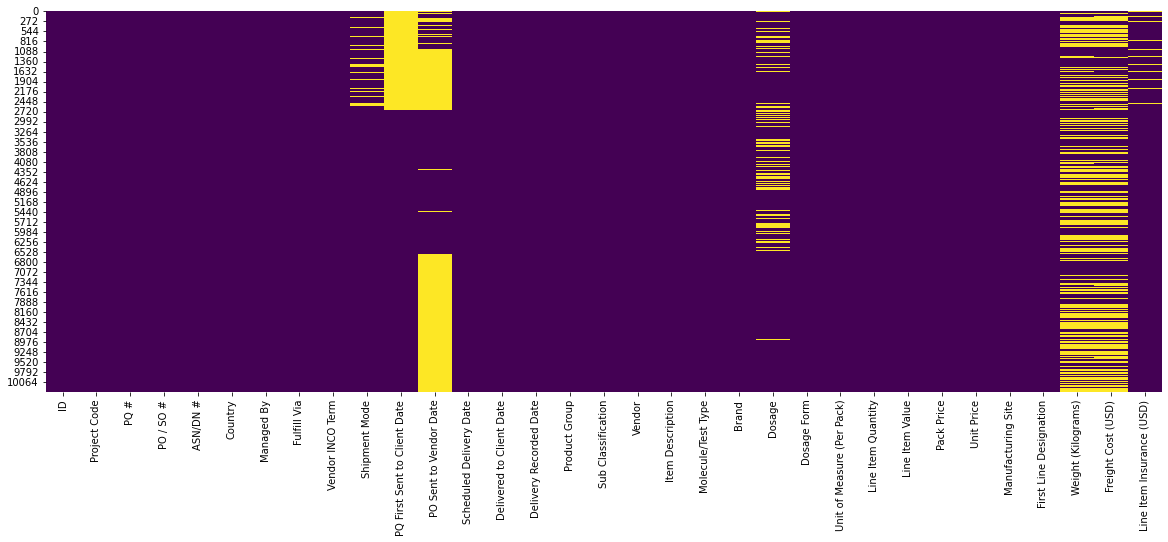

In [80]:
plt.figure(figsize=(20,7))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

### Yellow horizontal lines represents the null values.
### Shipment Mode, PQ First Sent to Client Date, PO Sent to Vendor Date , Dosage, Weight (Kilograms), Freight Cost (USD) and Line Item Insurance (USD) have many null values. We will deal with them while performing data cleaning

# Understanding numerical features

In [81]:
numerical_columns=[]
for column in df.columns:
    if (df[column].dtype=='int64') or (df[column].dtype=='float64'):
        numerical_columns.append(column)

In [82]:
numerical_columns

['ID',
 'Unit of Measure (Per Pack)',
 'Line Item Quantity',
 'Line Item Value',
 'Pack Price',
 'Unit Price',
 'Weight (Kilograms)',
 'Freight Cost (USD)',
 'Line Item Insurance (USD)']

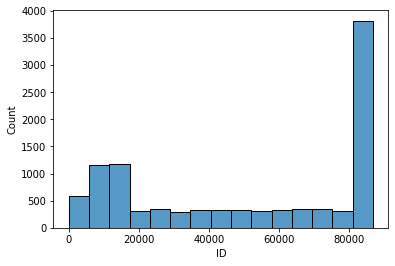

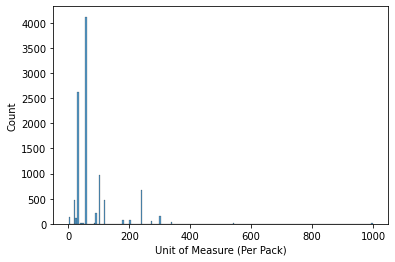

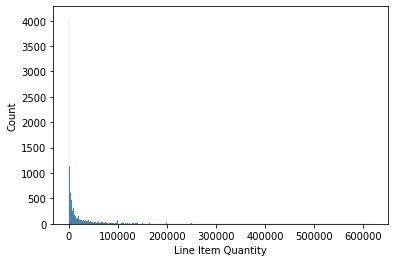

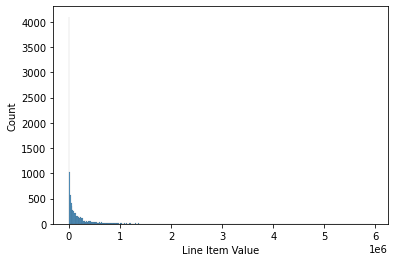

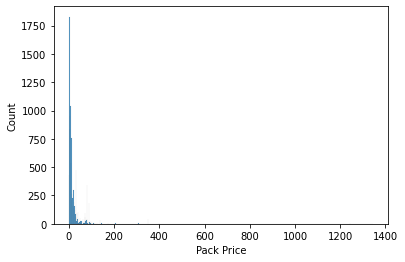

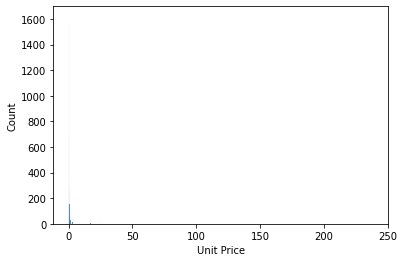

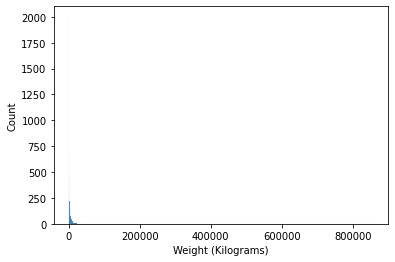

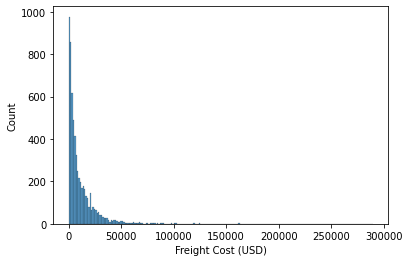

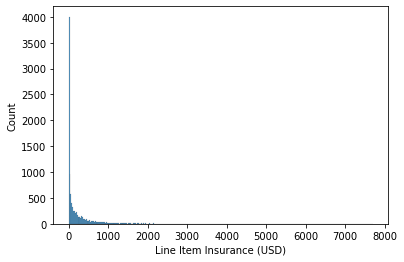

In [83]:
for column in numerical_columns:
    sns.histplot(df[column])
    plt.show()

### Hmm! looks like there are many log normal distributions.

### Outliers check

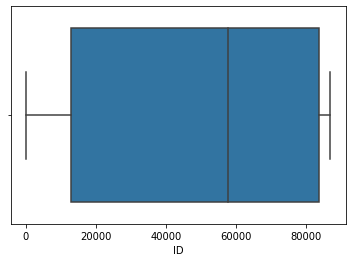

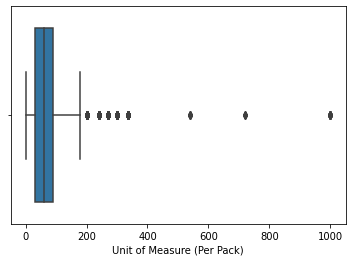

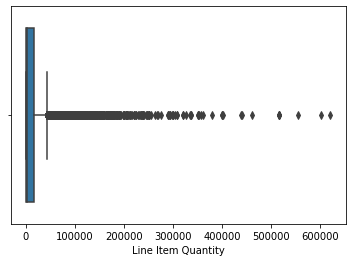

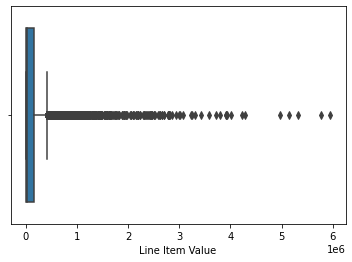

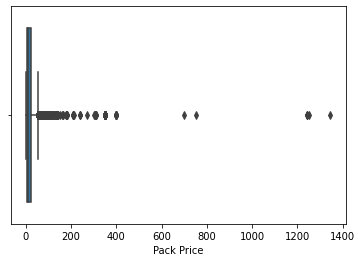

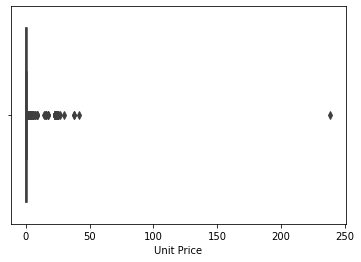

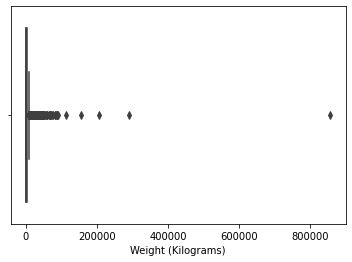

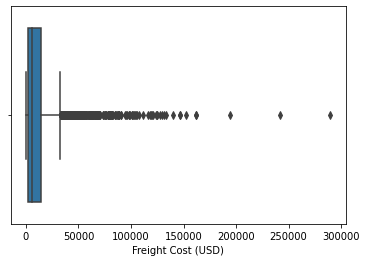

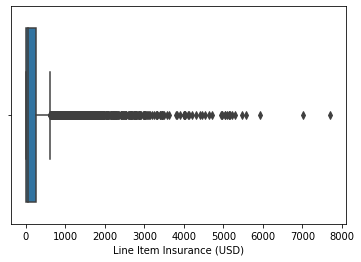

In [84]:
for column in numerical_columns:
    sns.boxplot(df[column])
    plt.xlabel(column)
    plt.show()

#### OHH!! Too many outliers, will get back to them during the cleaning phase

In [85]:
df.corr()

,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
ID,1.000000,-0.083356,0.192006,0.136335,-0.168745,-0.073268,0.072351,0.107974,0.103557
Unit of Measure (Per Pack),-0.083356,1.000000,-0.151020,-0.128666,0.097182,-0.102806,-0.034078,-0.053904,-0.131825
Line Item Quantity,0.192006,-0.151020,1.000000,0.839081,-0.133651,-0.052227,0.355840,0.378289,0.798662
Line Item Value,0.136335,-0.128666,0.839081,1.000000,-0.018809,-0.019583,0.351372,0.429676,0.961353
Pack Price,-0.168745,0.097182,-0.133651,-0.018809,1.000000,0.250043,-0.041042,-0.017971,-0.015398
Unit Price,-0.073268,-0.102806,-0.052227,-0.019583,0.250043,1.000000,-0.014297,0.082832,-0.021433
Weight (Kilograms),0.072351,-0.034078,0.355840,0.351372,-0.041042,-0.014297,1.000000,0.232052,0.617192
Freight Cost (USD),0.107974,-0.053904,0.378289,0.429676,-0.017971,0.082832,0.232052,1.000000,0.377987
Line Item Insurance (USD),0.103557,-0.131825,0.798662,0.961353,-0.015398,-0.021433,0.617192,0.377987,1.000000


In [86]:
#we can observe that the correlation of 'Weight (Kilograms)','Line Item Quantity','Pack Price' and 'Line Item Insurance (USD) 
# is strong with the target variable 'Freight Cost (USD)' 

# Let's move to  the categorical variables

In [87]:
# we say that if the no. of classes is less than 10 then the column is a categorical column
categorical_columns=[]
for column in df.columns:
    if(len(df[column].unique())<10):
        categorical_columns.append(column)
    else:
        continue

In [88]:
categorical_columns

['Managed By',
 'Fulfill Via',
 'Vendor INCO Term',
 'Shipment Mode',
 'Product Group',
 'Sub Classification',
 'First Line Designation']

In [89]:
print('No. of unique categories in every column\n')
for i in categorical_columns:
    print(i,':',len(df[i].unique()),'\n')
    

No. of unique categories in every column

Managed By : 4 

Fulfill Via : 2 

Vendor INCO Term : 8 

Shipment Mode : 5 

Product Group : 5 

Sub Classification : 6 

First Line Designation : 2 



Feature name: Managed By  
 unique elements of this column are ['PMO - US' 'South Africa Field Office' 'Haiti Field Office'
 'Ethiopia Field Office']


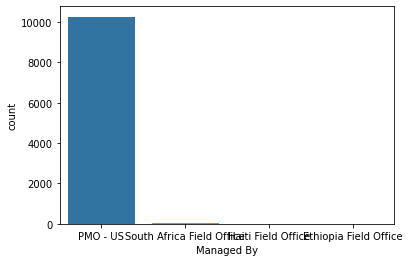





Feature name: Fulfill Via  
 unique elements of this column are ['Direct Drop' 'From RDC']


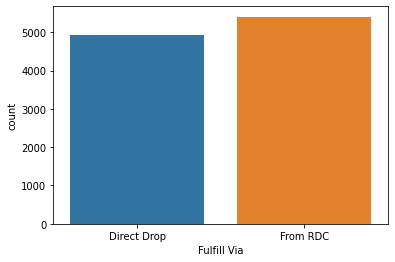





Feature name: Vendor INCO Term  
 unique elements of this column are ['EXW' 'FCA' 'DDU' 'CIP' 'DDP' 'CIF' 'N/A - From RDC' 'DAP']


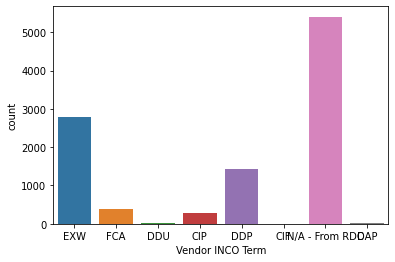





Feature name: Shipment Mode  
 unique elements of this column are ['Air' nan 'Truck' 'Air Charter' 'Ocean']


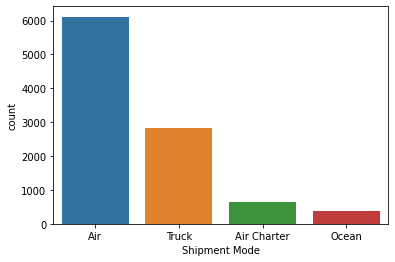





Feature name: Product Group  
 unique elements of this column are ['HRDT' 'ARV' 'ACT' 'MRDT' 'ANTM']


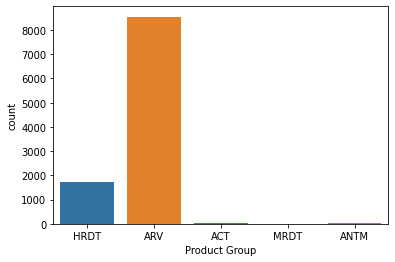





Feature name: Sub Classification  
 unique elements of this column are ['HIV test' 'Pediatric' 'Adult' 'HIV test - Ancillary' 'ACT' 'Malaria']


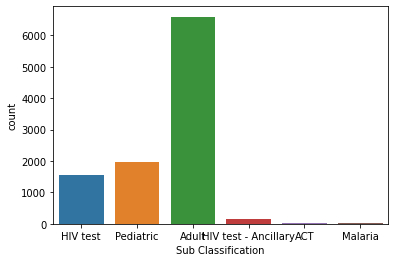





Feature name: First Line Designation  
 unique elements of this column are ['Yes' 'No']


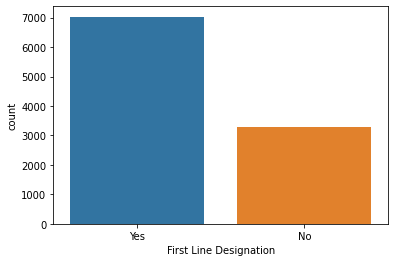

In [90]:
import warnings
warnings.filterwarnings('ignore')
for i  in categorical_columns:
        print('Feature name:',i,' \n unique elements of this column are',df[i].unique())
        sns.countplot(df[i])
        plt.xlabel(i)
        plt.ylabel('count')
        plt.show()
        print('\n\n\n')

points to be noted:
 1. Almost all the deliveries are managed by PMO-US, thus we'll be removing this column
 2.

### Pretty much unbalanced data

### lets's look at the avg. frieght cost for each category of categorical columns

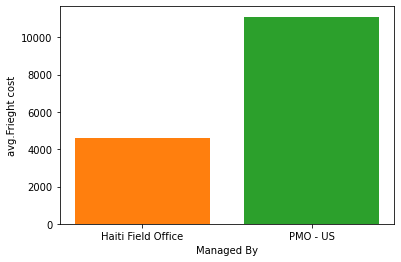

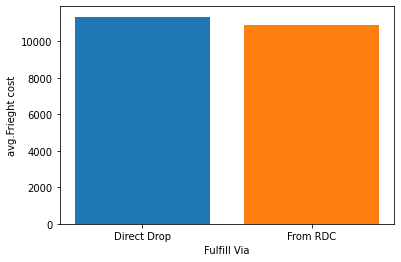

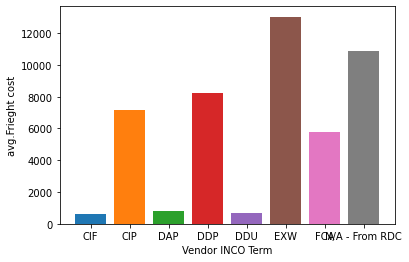

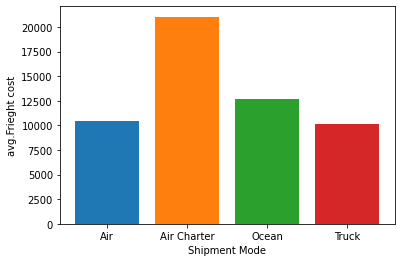

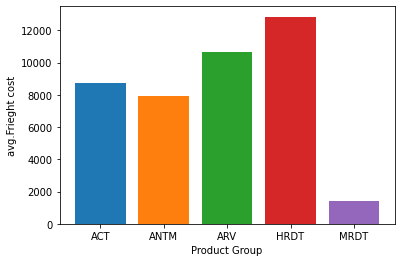

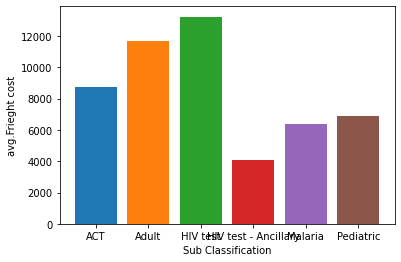

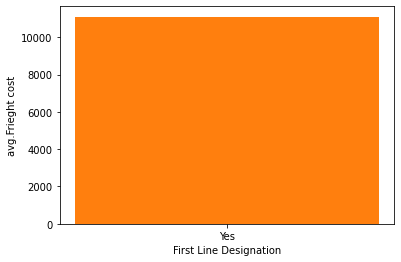

In [91]:
for column in categorical_columns:
    g=df.groupby(column)
    for name,df1 in g:
        plt.bar(name,df1['Freight Cost (USD)'].mean())
        plt.ylabel('avg.Frieght cost')
    plt.xlabel(column)
    plt.show()


### Oh! why the last bar graph giving only one bar?
### that means the frieght cost is not defined where 'First Line Designation' is categorised as 'No', let's see

In [92]:
g=df.groupby('First Line Designation')
for name,df1 in g:
    if name=='No':
        print(df1['Freight Cost (USD)'])

8       NaN
48      NaN
57      NaN
78      NaN
79      NaN
         ..
10318   NaN
10319   NaN
10320   NaN
10321   NaN
10323   NaN
Name: Freight Cost (USD), Length: 3294, dtype: float64


### we can see that all are Nan values, So there is no meaning of having this column
### we will  delete it in cleaning phase

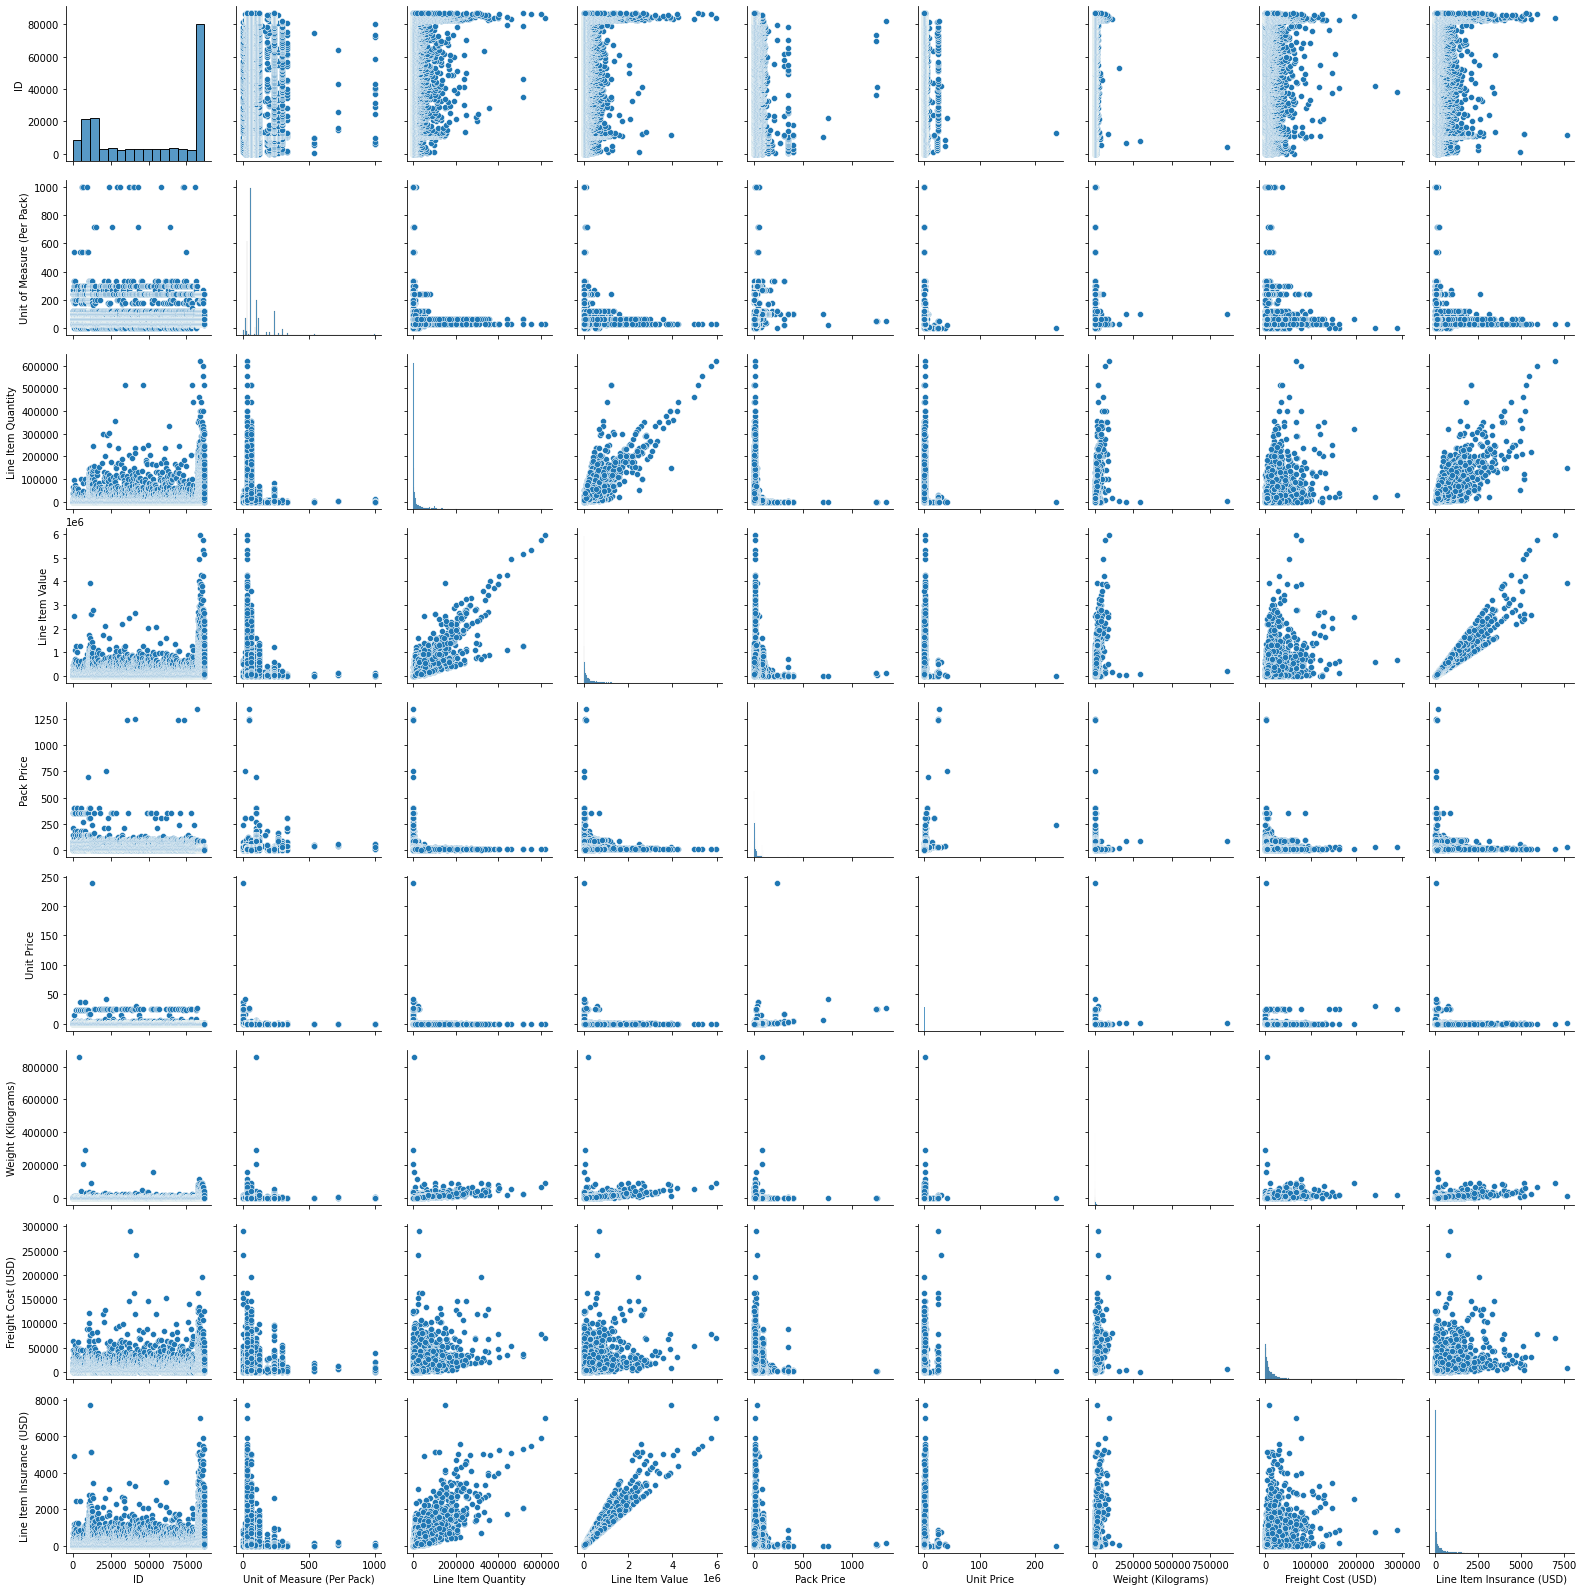

In [93]:
sns.pairplot(df[numerical_columns])

# Data Cleaning

In [94]:
# AS I observed that there are some values in these two columns having zero value which is not permissible
df=df[(df['Weight (Kilograms)']>0) & (df['Line Item Value']>0)]

In [95]:
#dropping the 'First Line Designation' as discussed during data exploration
df.drop('First Line Designation',axis=1,inplace=True)

###  handling missing and Na values 

In [96]:
#dropping the columns with all the features as null
df = df.dropna(how='all')

In [97]:
# let's first drop the categorical variables with too many classes
dropped_categorical=[]
for i in df.columns:
    if(len(df[i].unique())>10 and df[i].dtype=='object'):
        dropped_categorical.append(i)
        df.drop(i,axis=1,inplace=True)

In [98]:
print('categorical features dropped having too many classes:',dropped_categorical)

categorical features dropped having too many classes: ['Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country', 'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage', 'Dosage Form', 'Manufacturing Site']


In [99]:
# dropping 'ID' column as it is of no use
df.drop('ID',axis=1,inplace=True)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6359 entries, 0 to 10322
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Managed By                    6359 non-null   object        
 1   Fulfill Via                   6359 non-null   object        
 2   Vendor INCO Term              6359 non-null   object        
 3   Shipment Mode                 6146 non-null   object        
 4   PQ First Sent to Client Date  4773 non-null   datetime64[ns]
 5   PO Sent to Vendor Date        2935 non-null   datetime64[ns]
 6   Scheduled Delivery Date       6359 non-null   datetime64[ns]
 7   Delivered to Client Date      6359 non-null   datetime64[ns]
 8   Delivery Recorded Date        6359 non-null   datetime64[ns]
 9   Product Group                 6359 non-null   object        
 10  Sub Classification            6359 non-null   object        
 11  Unit of Measure (Per Pack)   

In [101]:
# we observe that there is almost 96 % correlation between 'Line Item Insurance (USD)' and 'Line Item Value'  and the former value has many missing values
# thus dropping 'Line Item Insurance (USD)' feature
df.drop('Line Item Insurance (USD)',axis=1,inplace=True)

In [102]:
# we cannot hancle the missing values in the targer columns itself. thus dropping the columns having na values in this column
df = df.dropna(subset=['Freight Cost (USD)'])

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6162 entries, 0 to 10316
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Managed By                    6162 non-null   object        
 1   Fulfill Via                   6162 non-null   object        
 2   Vendor INCO Term              6162 non-null   object        
 3   Shipment Mode                 5951 non-null   object        
 4   PQ First Sent to Client Date  4605 non-null   datetime64[ns]
 5   PO Sent to Vendor Date        2900 non-null   datetime64[ns]
 6   Scheduled Delivery Date       6162 non-null   datetime64[ns]
 7   Delivered to Client Date      6162 non-null   datetime64[ns]
 8   Delivery Recorded Date        6162 non-null   datetime64[ns]
 9   Product Group                 6162 non-null   object        
 10  Sub Classification            6162 non-null   object        
 11  Unit of Measure (Per Pack)   

#### we dont need the columns having datetime datatype as we are not perform time series forecasting here

In [104]:
df.drop(['PQ First Sent to Client Date','PO Sent to Vendor Date','Scheduled Delivery Date','Delivered to Client Date', 'Delivery Recorded Date'],axis=1,inplace=True)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6162 entries, 0 to 10316
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Managed By                  6162 non-null   object 
 1   Fulfill Via                 6162 non-null   object 
 2   Vendor INCO Term            6162 non-null   object 
 3   Shipment Mode               5951 non-null   object 
 4   Product Group               6162 non-null   object 
 5   Sub Classification          6162 non-null   object 
 6   Unit of Measure (Per Pack)  6162 non-null   int64  
 7   Line Item Quantity          6162 non-null   int64  
 8   Line Item Value             6162 non-null   float64
 9   Pack Price                  6162 non-null   float64
 10  Unit Price                  6162 non-null   float64
 11  Weight (Kilograms)          6162 non-null   float64
 12  Freight Cost (USD)          6162 non-null   float64
dtypes: float64(5), int64(2), object(

#### for shipment mode column , we are going to fill it missing places with most common mode of transportation

In [106]:
df['Shipment Mode']=df['Shipment Mode'].fillna('Air')

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6162 entries, 0 to 10316
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Managed By                  6162 non-null   object 
 1   Fulfill Via                 6162 non-null   object 
 2   Vendor INCO Term            6162 non-null   object 
 3   Shipment Mode               6162 non-null   object 
 4   Product Group               6162 non-null   object 
 5   Sub Classification          6162 non-null   object 
 6   Unit of Measure (Per Pack)  6162 non-null   int64  
 7   Line Item Quantity          6162 non-null   int64  
 8   Line Item Value             6162 non-null   float64
 9   Pack Price                  6162 non-null   float64
 10  Unit Price                  6162 non-null   float64
 11  Weight (Kilograms)          6162 non-null   float64
 12  Freight Cost (USD)          6162 non-null   float64
dtypes: float64(5), int64(2), object(

#### Replacing the null values in column 'Weight (Kilograms)' with the median value

In [108]:
df['Weight (Kilograms)'].fillna(df['Weight (Kilograms)'].median(),inplace=True)

In [109]:
df.corr()

,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Weight (Kilograms),Freight Cost (USD)
Unit of Measure (Per Pack),1.000000,-0.151440,-0.125523,0.122957,-0.103176,-0.033626,-0.053856
Line Item Quantity,-0.151440,1.000000,0.817208,-0.165079,-0.061099,0.352684,0.378336
Line Item Value,-0.125523,0.817208,1.000000,-0.027560,-0.028029,0.348003,0.429890
Pack Price,0.122957,-0.165079,-0.027560,1.000000,0.205479,-0.041576,-0.017146
Unit Price,-0.103176,-0.061099,-0.028029,0.205479,1.000000,-0.014244,0.083046
Weight (Kilograms),-0.033626,0.352684,0.348003,-0.041576,-0.014244,1.000000,0.232153
Freight Cost (USD),-0.053856,0.378336,0.429890,-0.017146,0.083046,0.232153,1.000000


In [110]:
#removing 'Unit of Measure (Per Pack) , Pack Price and Unit Price' column as these have nearly zero correaltion with target column and using  domain knowledge , i can say that these are not relevant features for the prediction
df.drop(['Unit of Measure (Per Pack)' , 'Pack Price','Unit Price'],axis=1,inplace=True)

# Treatment of outliers

In [111]:
# distinguishing numerical variables to make boxplots
numerical_var=[column for column in df.columns if df[column].dtype=='float64' or df[column].dtype=='int64']

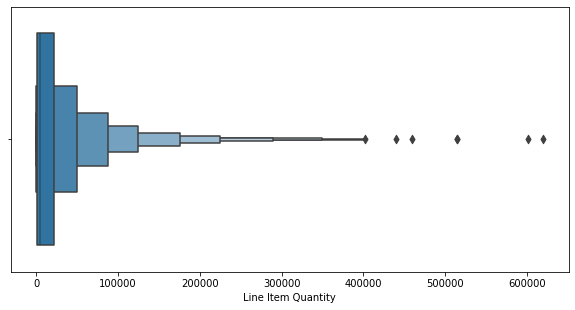

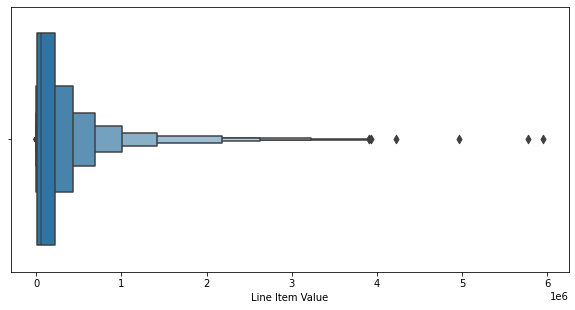

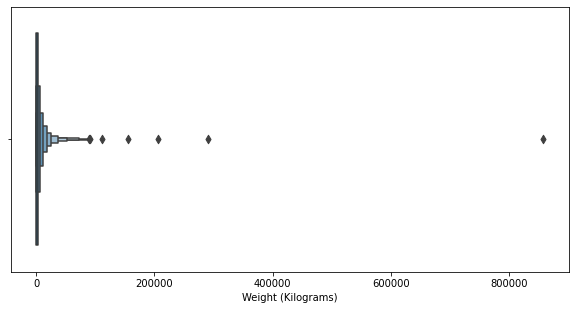

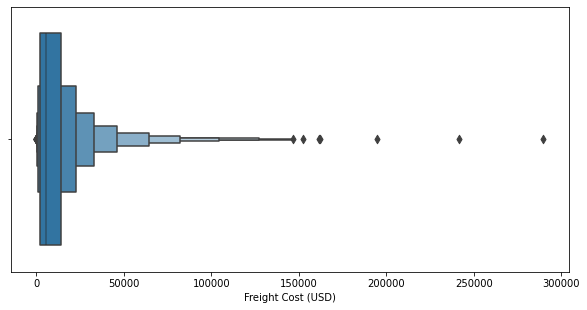

In [112]:
%matplotlib inline
for index,column in enumerate(df[numerical_var].columns):
    fig=plt.figure(figsize=(10,40))
    plt.subplot(7,1,index+1)
    sns.boxenplot(df[column])
    plt.xlabel(column)

In [113]:
# deleting outliers using the Inter Quartile Range
for column in numerical_var:
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    iqr_value=Q3-Q1
    lower_bound=Q1-(1.5*iqr_value)
    upper_bound=Q3+(1.5*iqr_value)
    df=df[(df[column]>lower_bound) & (df[column]<upper_bound)]

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4319 entries, 0 to 10316
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Managed By          4319 non-null   object 
 1   Fulfill Via         4319 non-null   object 
 2   Vendor INCO Term    4319 non-null   object 
 3   Shipment Mode       4319 non-null   object 
 4   Product Group       4319 non-null   object 
 5   Sub Classification  4319 non-null   object 
 6   Line Item Quantity  4319 non-null   int64  
 7   Line Item Value     4319 non-null   float64
 8   Weight (Kilograms)  4319 non-null   float64
 9   Freight Cost (USD)  4319 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 371.2+ KB


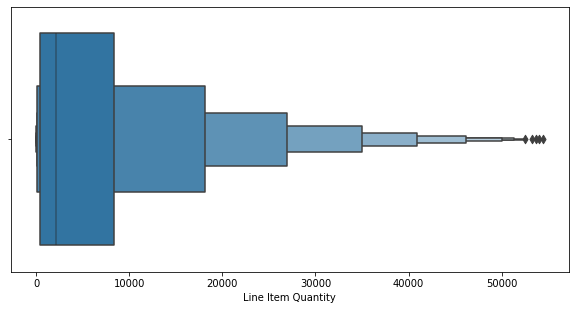

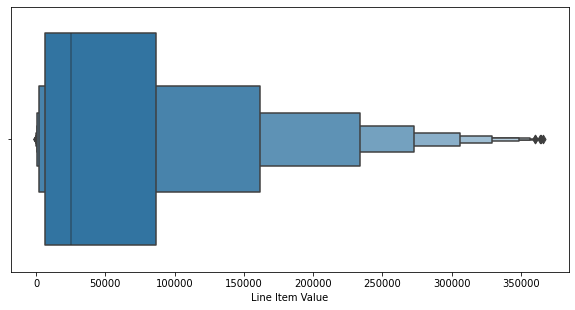

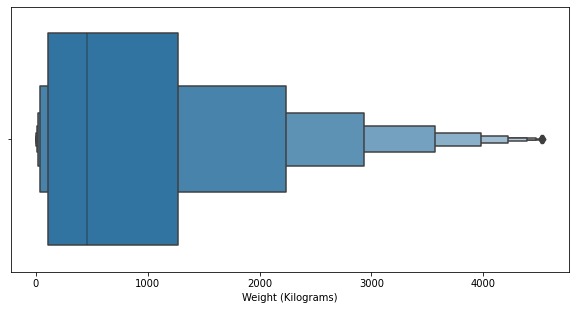

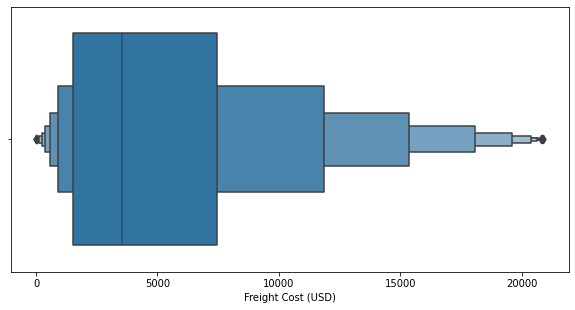

In [115]:
%matplotlib inline
for index,column in enumerate(df[numerical_var].columns):
    fig=plt.figure(figsize=(10,40))
    plt.subplot(7,1,index+1)
    sns.boxenplot(df[column])
    plt.xlabel(column)

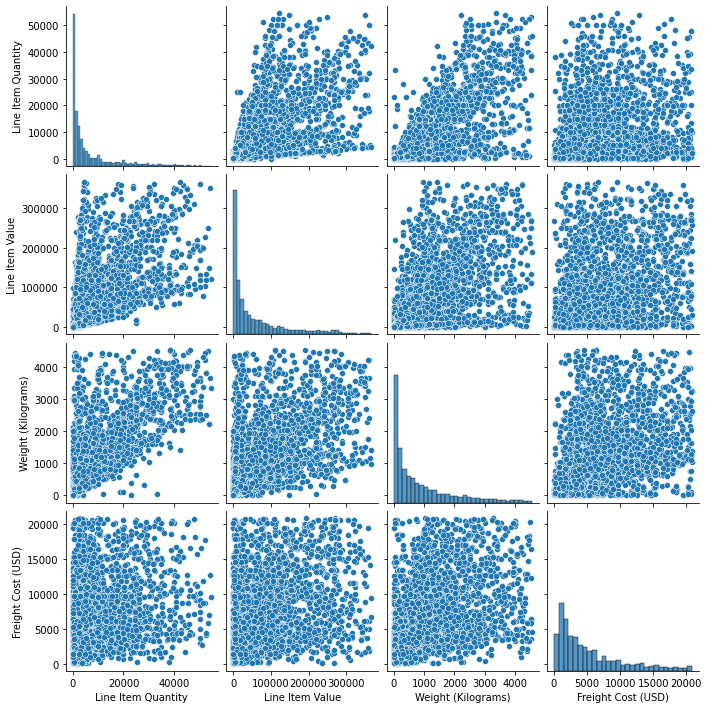

In [116]:
sns.pairplot(df)

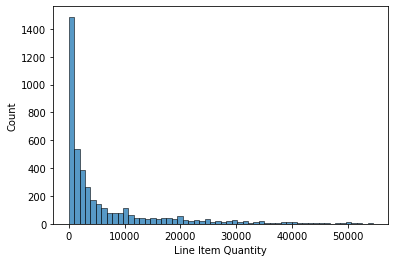

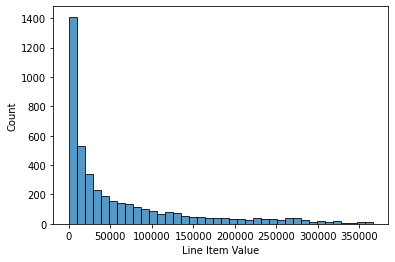

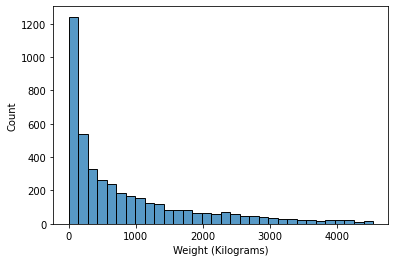

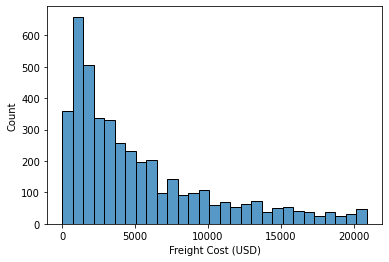

In [117]:
for column in numerical_var:
    sns.histplot(df[column])
    plt.show()

In [118]:
## Hmm ! Log normal distribution
for column in numerical_var:
    df[column]=np.log10(df[column])


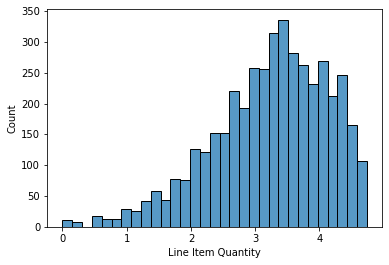

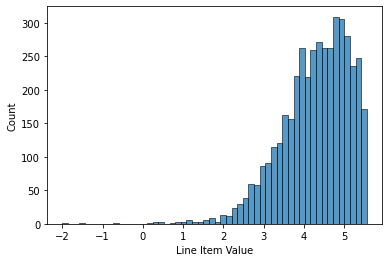

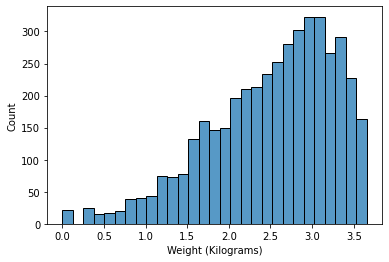

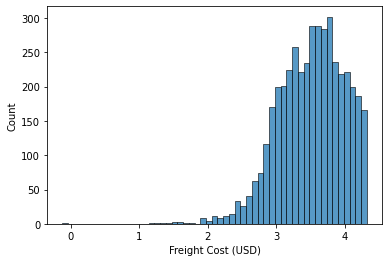

In [119]:
for column in numerical_var:
    sns.histplot(df[column])
    plt.show()

## All became nearly normally distributed :)

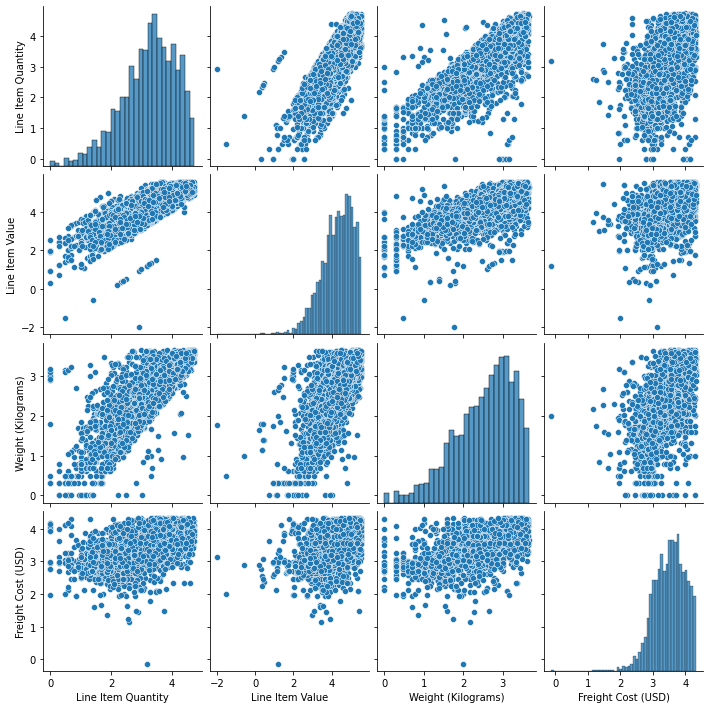

In [120]:
sns.pairplot(df)

## changed alot

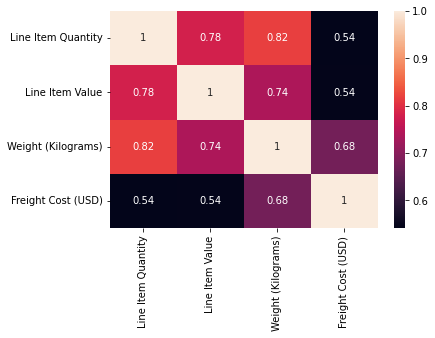

In [121]:
sns.heatmap(df.corr(),annot=True)
plt.show()

# we observe that the correlations improved after data cleaning and distribution change

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4319 entries, 0 to 10316
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Managed By          4319 non-null   object 
 1   Fulfill Via         4319 non-null   object 
 2   Vendor INCO Term    4319 non-null   object 
 3   Shipment Mode       4319 non-null   object 
 4   Product Group       4319 non-null   object 
 5   Sub Classification  4319 non-null   object 
 6   Line Item Quantity  4319 non-null   float64
 7   Line Item Value     4319 non-null   float64
 8   Weight (Kilograms)  4319 non-null   float64
 9   Freight Cost (USD)  4319 non-null   float64
dtypes: float64(4), object(6)
memory usage: 500.2+ KB


# Label Encoding

In [123]:
df.columns

Index(['Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'Product Group', 'Sub Classification', 'Line Item Quantity',
       'Line Item Value', 'Weight (Kilograms)', 'Freight Cost (USD)'],
      dtype='object')

In [124]:
for column  in df.columns:
    if(df[column].dtype =='object'):
        le=LabelEncoder()
        df[column]=le.fit_transform(df[column])

# Feature selection
# we are going to use the chi2 test for feature selection

In [125]:
chi2_features=SelectKBest(chi2,k=3)

In [126]:
Xkbestfeatures=chi2_features.fit_transform(df[[ 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode','Product Group', 'Sub Classification']],df[['Freight Cost (USD)']].astype('int64'))

In [127]:
Xkbestfeatures

array([[5, 0, 2],
       [5, 0, 5],
       [6, 0, 2],
       ...,
       [7, 3, 1],
       [7, 3, 5],
       [7, 1, 1]])

### The top categorical features are Vendor INCO Term,Shipment Mode,Sub Classification as the values of same are present above

# Train test split

In [128]:
X_train, X_test, y_train, y_test=train_test_split(df.drop(['Freight Cost (USD)','Managed By','Product Group','Fulfill Via'],axis=1),df[['Freight Cost (USD)']],test_size=0.2)

In [129]:
X_train

,Vendor INCO Term,Shipment Mode,Sub Classification,Line Item Quantity,Line Item Value,Weight (Kilograms)
7690,7,1,1,3.916822,4.822078,2.910624
9928,7,1,1,3.230449,4.280442,2.350248
4224,5,0,1,4.368380,4.739448,3.030600
9019,7,0,1,3.936514,5.113762,2.890421
10245,7,3,1,3.432488,4.482868,2.419956
...,...,...,...,...,...,...
7281,7,3,1,4.187323,4.521777,2.885361
6218,5,0,1,3.255273,4.653213,2.352183
2373,7,0,1,2.903090,3.878522,1.875061
8849,7,1,1,4.520444,5.339988,1.505150


# K nearest neighbour regressor

In [130]:
params=[{'n_neighbors':list(range(1,50))}]

In [131]:
knn=KNeighborsRegressor()
cv_knn=GridSearchCV(estimator=knn,param_grid=params)


In [132]:
cv_knn.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]}])

In [133]:
cv_knn.best_params_

{'n_neighbors': 16}

In [134]:
cv_knn.score(X_test,y_test)

0.5765471581590815

# Random forest regressor

In [135]:
params=[{'n_estimators':[10,20,30,40,50,60,70,80,90,100],'max_depth':list(range(0,20))}]

In [136]:
rf=RandomForestRegressor()

In [137]:
rf_cv=GridSearchCV(estimator=rf,param_grid=params)

In [138]:
rf_cv.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                        12, 13, 14, 15, 16, 17, 18, 19],
                          'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                           100]}])

In [139]:
rf_cv.score(X_test,y_test)

0.6058756481103967

In [140]:
rf_cv.best_params_

{'max_depth': 9, 'n_estimators': 90}

# Modifications and suggetions are welcome

#  Don't forget to give an upvote if you enjoyed  :)